In [149]:
import os, shutil

In [170]:
original_dataset_dir = '/Users/seino/Documents/res/09_DeepLearning/img/With_Gingiva/Mix/256'
base_dir = '/Users/seino/Documents/res/09_DeepLearning/playground/teeth_recognition/small_dataset'

In [171]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [172]:
import random

all_list = os.listdir(original_dataset_dir)
random.shuffle(all_list)

In [173]:
train_fn = all_list[:100]
for fn in train_fn:
    src = os.path.join(original_dataset_dir, fn)
    dst = os.path.join(train_dir, fn)
    shutil.copyfile(src, dst)

In [174]:
validation_fn = all_list[100:150]
for fn in validation_fn:
    src = os.path.join(original_dataset_dir, fn)
    dst = os.path.join(validation_dir, fn)
    shutil.copyfile(src, dst)

In [175]:
test_fn = all_list[150:200]
for fn in test_fn:
    src = os.path.join(original_dataset_dir, fn)
    dst = os.path.join(test_dir, fn)
    shutil.copyfile(src, dst)

In [176]:
from keras import layers
from keras import models
from keras import optimizers

In [187]:
height = 256
width = 256
channels = 3
num_classes = 32

model = models.Sequential()

model.add(layers.SeparableConv2D(256, 3, activation='relu', input_shape=(height, width, channels)))
model.add(layers.SeparableConv2D(512, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(512, 3, activation='relu'))
model.add(layers.SeparableConv2D(1024, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))

model.add(layers.SeparableConv2D(256, 3, activation='relu'))
model.add(layers.SeparableConv2D(128, 3, activation='relu'))
model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [188]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_19 (Separab (None, 254, 254, 256)     1051      
_________________________________________________________________
separable_conv2d_20 (Separab (None, 252, 252, 512)     133888    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 126, 126, 512)     0         
_________________________________________________________________
separable_conv2d_21 (Separab (None, 124, 124, 512)     267264    
_________________________________________________________________
separable_conv2d_22 (Separab (None, 122, 122, 1024)    529920    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 61, 61, 1024)      0         
_________________________________________________________________
separable_conv2d_23 (Separab (None, 59, 59, 256)       271616    
__________

In [189]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [190]:
X = []
train_list = os.listdir(train_dir)

for fn in train_list:
    dst = os.path.join(train_dir, fn)
    img = img_to_array(load_img(dst))
    X.append(img)
    

In [191]:
Y = []
def teeth_encode(file_name):
    dent = [
    11, 12, 13, 14, 15, 16, 17, 18,
    21, 22, 23, 24, 25, 26, 27, 28,
    31, 32, 33, 34, 35, 36, 37, 38,
    41, 42, 43, 44, 45, 46, 47, 48]
    encoded_dentition = [0]*32
    
    removed_fn = file_name.strip('[').strip('.png').strip(']')
    teeth_list = removed_fn.split(',')
    teeth_list = [int(k) for k in teeth_list]
    
    for each_teeth in teeth_list:
        if each_teeth in dent:
            p = dent.index(each_teeth)
            encoded_dentition[p] = 1
    return encoded_dentition

for fn in train_list:
    print(fn)
    encoded_dentition = teeth_encode(fn)
    print(encoded_dentition, len(encoded_dentition))
    Y.insert(-1, encoded_dentition)
    print('Yの要素数は', len(Y))
    print(type(Y))

[11, 12, 13, 14, 15, 16, 21, 25].png
[1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 32
Yの要素数は 1
<class 'list'>
[31, 32, 33, 35, 37, 41, 44, 46, 47].png
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0] 32
Yの要素数は 2
<class 'list'>
[31, 33, 34, 35, 37, 44, 47].png
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0] 32
Yの要素数は 3
<class 'list'>
[31, 34, 36, 37, 41, 42, 44, 47].png
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0] 32
Yの要素数は 4
<class 'list'>
[11, 12, 14, 21, 23, 25].png
[1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 32
Yの要素数は 5
<class 'list'>
[31, 34, 35, 36, 37, 41, 42, 43, 44, 45, 47].png
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0] 32
Yの要素数は 6
<class 'list'>
[11, 12, 15, 21, 24, 25, 26, 2

In [192]:
X = np.asarray(X)
Y = np.asarray(Y)

In [193]:
X = X.astype('float32')
X = X / 255.0

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=111)

In [195]:
callbacks = [
    keras.callbacks.TensorBoard(
    log_dir = '/Users/seino/Documents/res/09_DeepLearning/playground/teeth_recognition/my_log_dir',
    histogram_freq=1,
    embeddings_freq=1)
]

In [196]:
history = model.fit(X_train, y_train, batch_size=5, epochs=3, validation_data = (X_test, y_test), verbose = 0)


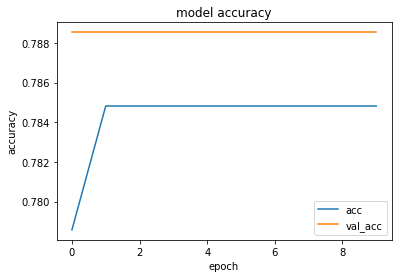

In [197]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()
